Interest rate calculator

In [61]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import itertools

#Variable depending on neighbor hood
real_estate_tax = 0.0277

#USA average for a person with excellent (800+) credit
mortgage_rate = np.linspace(0.0280, 0.100, num=10)

#Amount in the savings account
down_payment = np.array(range(30000,120000,1000))

#Predicting a 30 year mortgage period
mortgage_length = 30

#The value of $110 is an USA average
home_insurance = 110

#PMI rate is on the high end 
pmi_rate = 0.0100

#HOME PRICE
home_price = 380e3

In [62]:
#The PMI function to determine the PMI payment
def PMI(price, dwn_pmt, rate):
    pmi=[]
    for pmt in dwn_pmt:
        if pmt >= price * 0.20:
            pmi.append(0)
        else:
            pmi.append(((price - pmt) * rate) / 12)
    
    return np.array(pmi)

In [63]:
pmi_payment = np.array([])
monthly_payment = np.array([])
down_payment_arr = np.array([])
mortgage_rate_arr = np.array([])

# Methodology

You cannot iterate through float types and you cannot append np.arrays like they are lists.

Instead what will be done is to create separate pmi_payment and mortgage_payment np.arrays for each mortgage rate and then append them to overall lists

In [64]:
#Calculate monthly PMI for a mortgage payment
for rate in mortgage_rate:
    
    #Create the pmi_payment_append np.array for this particular mortgage rate
    pmi_payments_to_append = PMI(home_price, down_payment, pmi_rate)

    #Create the monthly_payments_to_append np.array for this particular mortgage rate
    monthly_payments_to_append = -(npf.pmt(rate/12, mortgage_length*12, home_price - down_payment)) + \
                    (home_price * real_estate_tax) / 12 + \
                    home_insurance + \
                    pmi_payments_to_append

    #Create the mortgageRates_to_append np.array
    mortgageRates_to_append = np.empty((len(down_payment),), dtype = np.float); mortgageRates_to_append.fill(rate)

    #Append the pmi_payments_to_append to the overall pmi_payment list
    pmi_payment = np.append(pmi_payment, pmi_payments_to_append)
    monthly_payment = np.append(monthly_payment, monthly_payments_to_append)
    mortgage_rate_arr = np.append(mortgage_rate_arr, mortgageRates_to_append)
    down_payment_arr = np.append(down_payment_arr, down_payment)

    #Reset the temporary append arrays for the next iteration
    pmi_payments_to_append = np.array([])
    monthly_payments_to_append = np.array([])

#Build the dataframe dictionary
pmt_dict = {
    "Monthly Payment": monthly_payment,
    "PMI Payment": pmi_payment,
    "Down Payment": down_payment_arr,
    "Mortgage Rate": mortgage_rate_arr
}

#Build the dataframe
pmts_df = pd.DataFrame(pmt_dict)

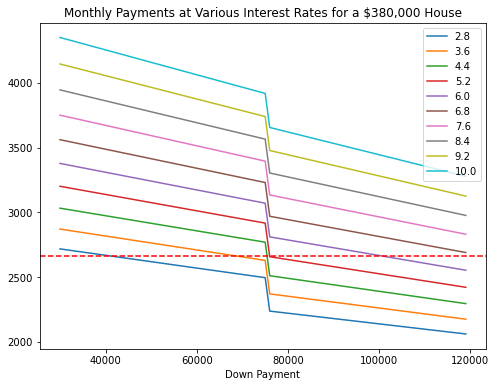

In [65]:
#Plotting the data

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,6))
pmts_grouped_df = pmts_df.groupby('Mortgage Rate').plot(x = 'Down Payment', y = 'Monthly Payment', kind='line', ax=ax)
plt.legend(np.round(mortgage_rate * 100, decimals=3))
plt.title("Monthly Payments at Various Interest Rates for a ${price:,.0f} House".format(price = home_price))
plt.axhline(y = 2660, color = 'r', linestyle = '--')
plt.show()